<a href="https://colab.research.google.com/github/satyajitghana/TSAI-DeepVision-EVA4.0/blob/master/Utils/Colab_25GBRAM_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Memory Information

In [0]:
import psutil
def get_size(bytes, suffix="B"):
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
print("="*40, "Memory Information", "="*40)
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}") ; print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}") ; print(f"Percentage: {svmem.percent}%")

======================================== Memory Information ========================================
Total: 25.51GB
Available: 24.54GB
Used: 634.74MB
Percentage: 3.8%


# GPU Information

In [0]:
! nvidia-smi

Sat May 16 10:39:27 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
!ls drive/My\ Drive/ML-work/NLP/text\ classification\ with\ spacy/

research_paper.csv


In [2]:
%cd drive/My\ Drive/ML-work/NLP/text\ classification\ with\ spacy/
# !ls
!pwd

/content/drive/My Drive/ML-work/NLP/text classification with spacy
/content/drive/My Drive/ML-work/NLP/text classification with spacy


Import the necessary modules

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
stopwords = stopwords.words('english')

Preview our dataset. The dataset consists of 2507 short research paper titles, which have been classified into 5 categories (by conferences) 

In [6]:
df = pd.read_csv('research_paper.csv')
df.head()

,Title,Conference
0,Innovation in Database Management: Computer Sc...,VLDB
1,High performance prime field multiplication fo...,ISCAS
2,enchanted scissors: a scissor interface for su...,SIGGRAPH
3,Detection of channel degradation attack by Int...,INFOCOM
4,Pinning a Complex Network through the Betweenn...,ISCAS


Check for null valued cells

In [7]:
df.isnull().sum()

Title         0
Conference    0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20, random_state=42)

print('Research paper title sample:', train['Title'].iloc[0])
print('Conference associated with the paper:', train['Conference'].iloc[0])
print('Shape of training data:', train.shape)
print('Shape of testing data', test.shape)

Research paper title sample: Textual and contextual patterns for sentiment analysis over microblogs.
Conference associated with the paper: WWW
Shape of training data: (2005, 2)
Shape of testing data (502, 2)


Plot distribution of various conferences

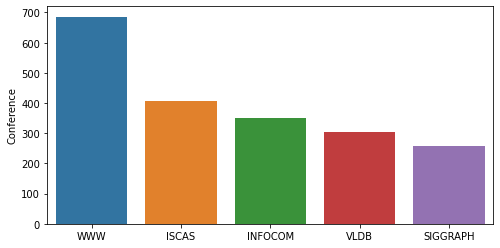

In [9]:
fig = plt.figure(figsize=(8,4))
sns.barplot(x = train['Conference'].unique(), y=train['Conference'].value_counts())
plt.show()

We now preprocess the text.
Then we take the top 2 conferences, WWW and ISCAS, and find top features from each of these conferences

In [0]:
import spacy

nlp = spacy.load('en_core_web_sm')
punctuations = string.punctuation

# Define function to cleanup text by removing personal pronouns, stopwords, and puncuation
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

In [0]:
WWW_text = [text for text in train[train['Conference'] == 'WWW']['Title']]

IS_text = [text for text in train[train['Conference'] == 'ISCAS']['Title']]

WWW_clean = cleanup_text(WWW_text)
WWW_clean = ' '.join(WWW_clean).split()

IS_clean = cleanup_text(IS_text)
IS_clean = ' '.join(IS_clean).split()

WWW_counts = Counter(WWW_clean)
IS_counts = Counter(IS_clean)

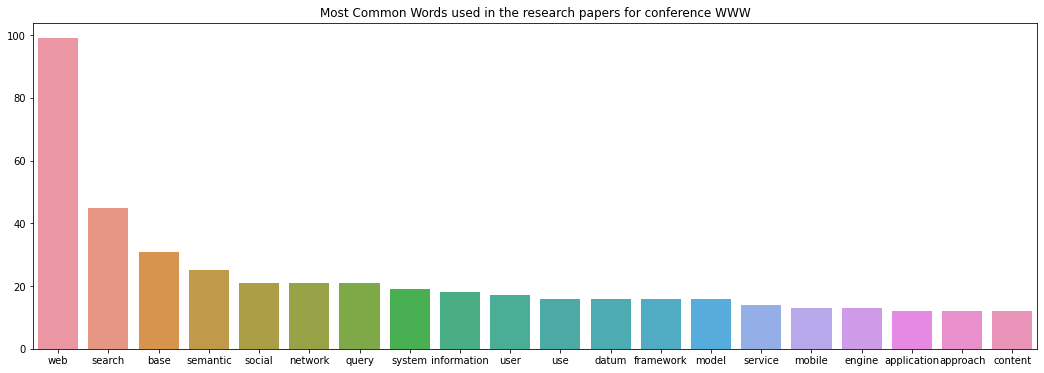

In [30]:
INFO_common_words = [word[0] for word in WWW_counts.most_common(20)]
INFO_common_counts = [word[1] for word in WWW_counts.most_common(20)]

fig = plt.figure(figsize=(18,6))
sns.barplot(x=INFO_common_words, y=INFO_common_counts)
plt.title('Most Common Words used in the research papers for conference WWW')
plt.show()


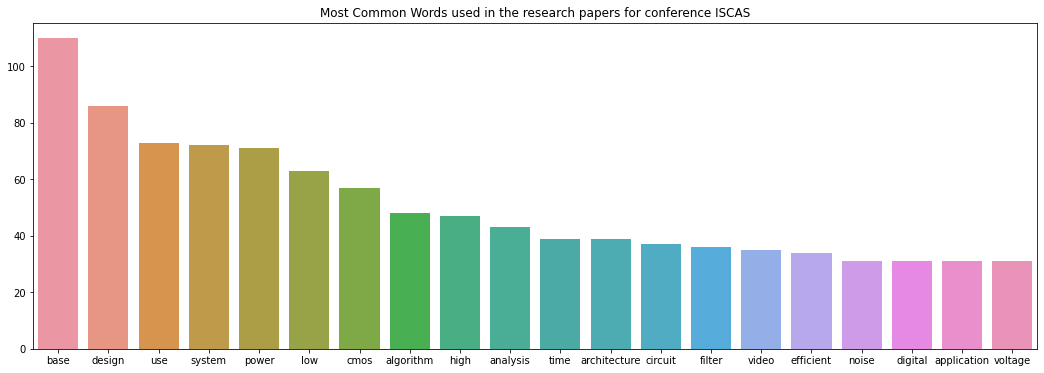

In [12]:
IS_common_words = [word[0] for word in IS_counts.most_common(20)]
IS_common_counts = [word[1] for word in IS_counts.most_common(20)]

fig = plt.figure(figsize=(18,6))
sns.barplot(x=IS_common_words, y=IS_common_counts)
plt.title('Most Common Words used in the research papers for conference ISCAS')
plt.show()

In [13]:
test.head()

,Title,Conference
2121,Architectural Issues in Distributed Data Base ...,VLDB
56,Compressive sampling of EMG bio-signals.,ISCAS
2479,User-Centered Modeling of Interactive Web Sites.,WWW
1292,A Decomposition Method for Transmission Schedu...,INFOCOM
1599,ASCENT: Adaptive Self-Configuring sEnsor Netwo...,INFOCOM


Some more text processing

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
import string
import re
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”"]

In [0]:
class CleanTextTransformer(TransformerMixin):
    def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}
    
def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    return text

def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens

Now, we train the model and obtain accuracy. We also print out the top 10 features from the first and secong classes

In [17]:
def printNMostInformative(vectorizer, clf, N):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    topClass1 = coefs_with_fns[:N]
    topClass2 = coefs_with_fns[:-(N + 1):-1]
    print("Class 1 best: ")
    for feat in topClass1:
        print(feat)
    print("Class 2 best: ")
    for feat in topClass2:
        print(feat)

vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
clf = LinearSVC()
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('clf', clf)])

# data
train1 = train['Title'].tolist()
labelsTrain1 = train['Conference'].tolist()

test1 = test['Title'].tolist()
labelsTest1 = test['Conference'].tolist()
# train
pipe.fit(train1, labelsTrain1)

# test
preds = pipe.predict(test1)
print("accuracy:", accuracy_score(labelsTest1, preds))
print("Top 10 features used to predict: ")

printNMostInformative(vectorizer, clf, 10)

pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer)])
transform = pipe.fit_transform(train1, labelsTrain1)
vocab = vectorizer.get_feature_names()

for i in range(len(train1)):
    s = ""
    indexIntoVocab = transform.indices[transform.indptr[i]:transform.indptr[i+1]]
    numOccurences = transform.data[transform.indptr[i]:transform.indptr[i+1]]
    for idx, num in zip(indexIntoVocab, numOccurences):
        s += str((vocab[idx], num))

accuracy: 0.7390438247011952
Top 10 features used to predict: 
Class 1 best: 
(-0.9393092073658282, 'resources')
(-0.9049255821898791, 'architectures')
(-0.8322156422946219, 'wimax')
(-0.8024003144806031, 'social')
(-0.7427562553788375, 'chip')
(-0.7051538657316918, 'chaotic')
(-0.7042578553543661, 'road')
(-0.6705466812478927, 'milgram')
(-0.6454127203714551, 'semantic')
(-0.6153366071385818, 'databases')
Class 2 best: 
(1.202542338833826, 'speccast')
(0.9592654903899118, 'manets')
(0.9194521876049861, 'measuring')
(0.8931964947994767, 'networks')
(0.8596754296648936, 'qos')
(0.8406204072499583, 'queueing')
(0.8334767304879102, 'ip')
(0.8319932183783335, 'policy')
(0.8079394714484975, 'split')
(0.8058493772532035, 'collection')


In [20]:
from sklearn import metrics

print(metrics.classification_report(labelsTest1, preds, target_names=df['Conference'].unique()))

              precision    recall  f1-score   support

        VLDB       0.83      0.74      0.78       108
       ISCAS       0.88      0.84      0.86       178
    SIGGRAPH       0.64      0.73      0.69        67
     INFOCOM       0.56      0.62      0.59        73
         WWW       0.59      0.62      0.61        76

    accuracy                           0.74       502
   macro avg       0.70      0.71      0.70       502
weighted avg       0.75      0.74      0.74       502

